In [162]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [163]:
#Read the data
startups = pd.read_csv("50_Startups.csv")
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [164]:
print('Number of Rows{}Columns'.format(startups.shape))

Number of Rows(50, 5)Columns


In [165]:
startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [166]:
startups.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [167]:
#check for missing values
startups.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

**Correlation**

In [168]:
startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [169]:
startups[startups.values==0.0]

,R&D Spend,Administration,Marketing Spend,State,Profit
19,86419.70,153514.11,0.00,New York,122776.86
47,0.00,135426.92,0.00,California,42559.73
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [170]:
#Renaming the columns
startups=startups.copy()
startups=startups.rename({"R&D Spend":'RnD',"Administration":'admin',"Marketing Spend":'marketing',"State":'state',"Profit":'profit'},axis=1)
startups.head()

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [171]:
print('Zero Values in R&D Spend is',(startups['RnD'] == 0).sum(),'\n'
      'Zero Values in Administration is',(startups['admin'] == 0).sum(),'\n'
      'Zero Values in Marketing is',(startups['marketing'] == 0).sum(),'\n'
      'Zero Values in Profit is',(startups['profit'] == 0).sum())

Zero Values in R&D Spend is 2 
Zero Values in Administration is 0 
Zero Values in Marketing is 3 
Zero Values in Profit is 0


<Axes: >

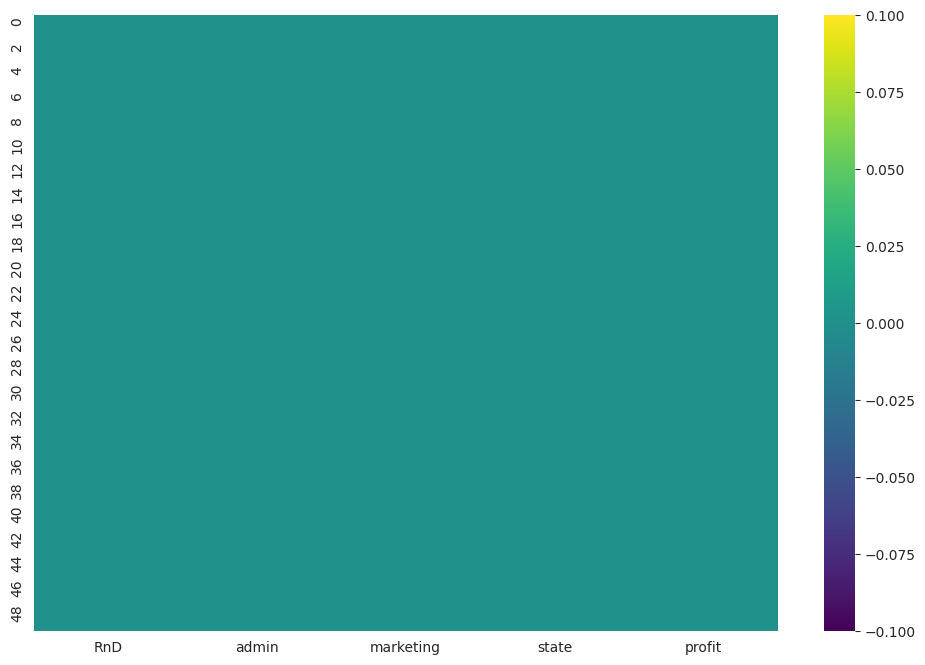

In [172]:
#Visualizing Missing Values
plt.figure(figsize=(12,8))
sns.heatmap(startups.isnull(),cmap='viridis')

In [173]:
startups[startups.duplicated()].shape

(0, 5)

In [174]:


startups.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

**Scatterplot**


In [175]:
#Visualizing Continuous Datatype for Outlier Detection
continuous_feature=[feature for feature in startups.columns if startups[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))


Continuous Feature Count 4


In [176]:
startups[startups.duplicated()]

,RnD,admin,marketing,state,profit


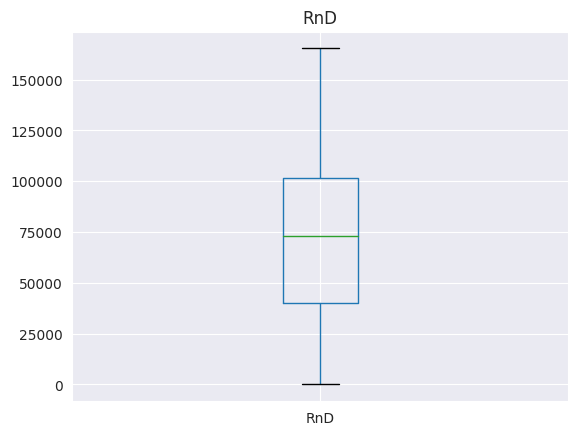

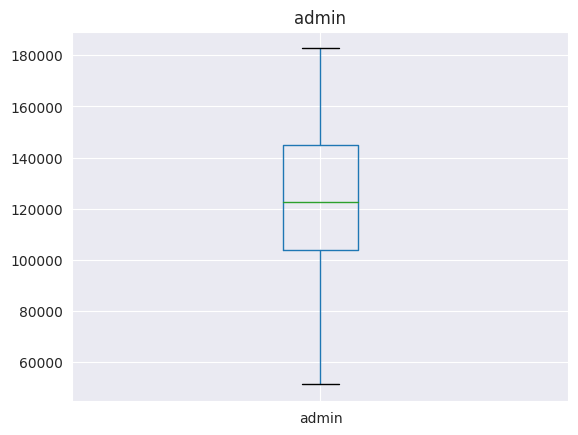

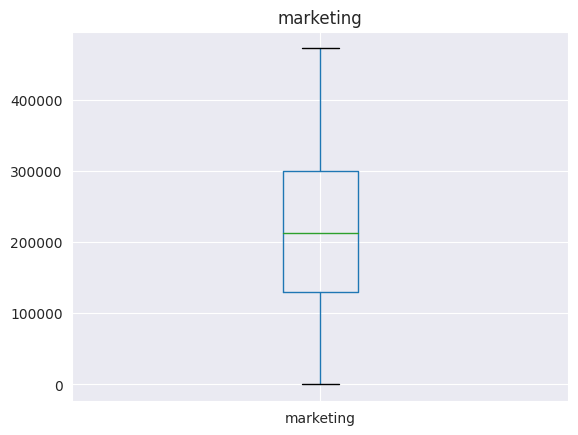

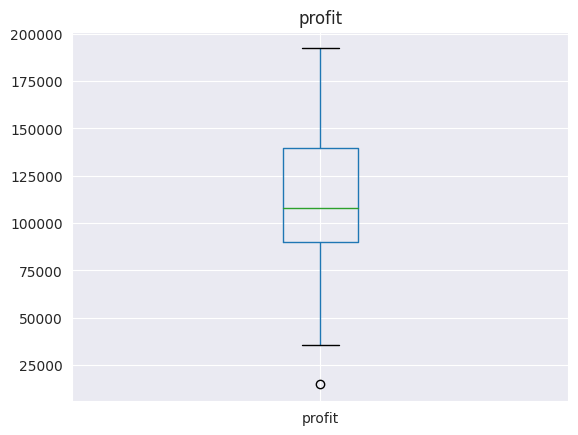

In [177]:
for feature in continuous_feature:
    data=startups.copy()
    data.boxplot(column=feature)
    plt.title(feature)
    plt.show()

In [178]:
#find the Outliers in the Profit Dependent Variable
Q1 = np.quantile(startups.profit,0.25)
Q3 = np.quantile(startups.profit,0.75)
med = np.median(startups.profit)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
print('First Quantile=', Q1,'\n' 'Second Quantile=', med,'\n' 'Third Quantile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper Whisker=', upper_bound,'\n' 'Lower Whisker=', lower_bound)

First Quantile= 90138.9025 
Second Quantile= 107978.19 
Third Quantile= 139765.97749999998 
Inter-Quartile Range= 49627.07499999998 
Upper Whisker= 214206.58999999997 
Lower Whisker= 15698.290000000023


In [179]:
Outliers = startups.profit[(startups.profit <= lower_bound) | (startups.profit >= upper_bound)]
print('The outlier in the boxplot:',Outliers)

The outlier in the boxplot: 49    14681.4
Name: profit, dtype: float64


In [180]:
display(startups[startups.index.isin([49])],startups.head())

,RnD,admin,marketing,state,profit
49,0.0,116983.8,45173.06,California,14681.4


,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


{'whiskers': [<matplotlib.lines.Line2D at 0x7ce66e59a200>,
 'caps': [<matplotlib.lines.Line2D at 0x7ce66e599b40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ce66e59a560>],
 'medians': [<matplotlib.lines.Line2D at 0x7ce66e599c30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ce66e5994b0>],
 'means': []}

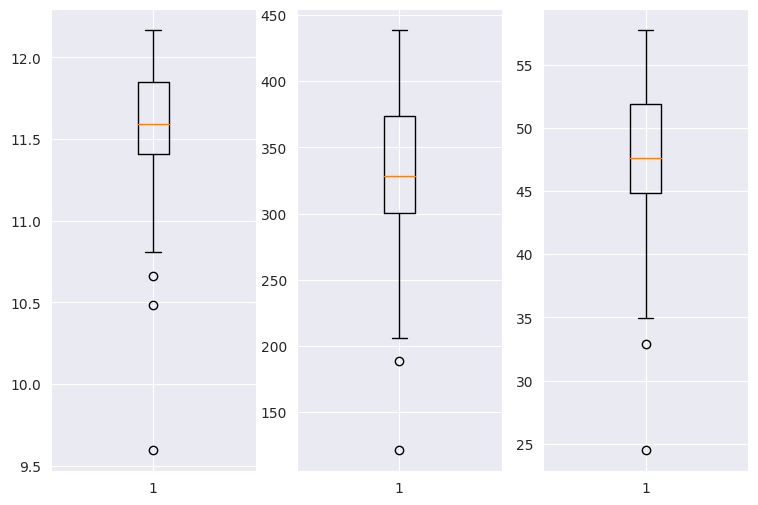

In [181]:
plt.subplots(figsize = (9,6))
plt.subplot(131)
plt.boxplot(np.log(startups['profit']))
plt.subplot(132)
plt.boxplot(np.sqrt(startups['profit']))
plt.subplot(133)
plt.boxplot(np.cbrt(startups['profit']))

In [182]:
raw_model = sm.ols("profit~RnD+admin+marketing", data = startups).fit()

In [183]:

# Finding rsquared values
raw_model.rsquared , raw_model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

Text(0.5, 1.0, 'Profit before median imputation')

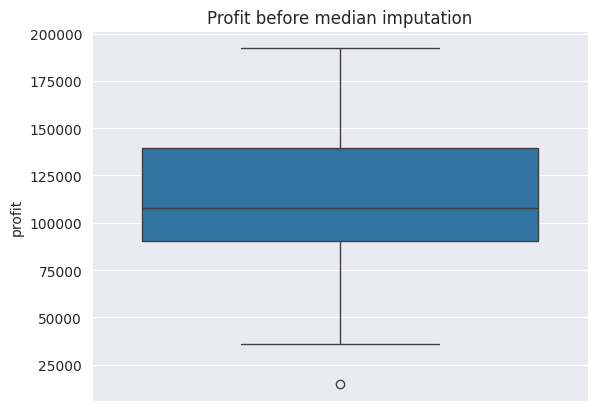

In [184]:
df1=startups.copy()
sns.boxplot(startups['profit'])
plt.title('Profit before median imputation')

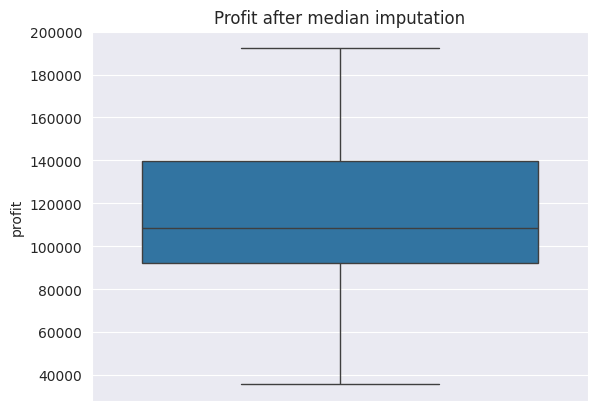

In [185]:
for i in df1['profit']:
    q1 = np.quantile(startups.profit,0.25)
    q3 = np.quantile(startups.profit,0.75)
    med = np.median(startups.profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['profit'] = df1['profit'].replace(i, np.median(df1['profit']))
sns.boxplot(df1['profit'])
plt.title('Profit after median imputation')
plt.show()

In [186]:
after_median_imputation_model = sm.ols("profit~RnD+admin+marketing", data = df1).fit()
# Finding rsquared values
after_median_imputation_model.rsquared , after_median_imputation_model.rsquared_adj

(0.9182958360807372, 0.91296730365122)

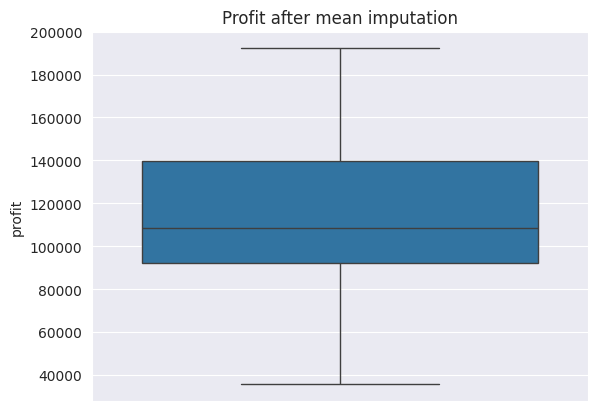

In [187]:
df2=startups.copy()
for i in df2['profit']:
    q1 = np.quantile(df2.profit,0.25)
    q3 = np.quantile(df2.profit,0.75)
    med = np.median(df2.profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['profit'] = df2['profit'].replace(i, np.mean(df2['profit']))
sns.boxplot(df2['profit'])
plt.title('Profit after mean imputation')
plt.show()

In [188]:
after_mean_imputation_model = sm.ols("profit~RnD+admin+marketing", data = df2).fit()
# Finding rsquared values
after_mean_imputation_model.rsquared , after_mean_imputation_model.rsquared_adj

(0.9119537155310937, 0.9062115665439912)

Text(0.5, 1.0, 'Profit after removing outliers')

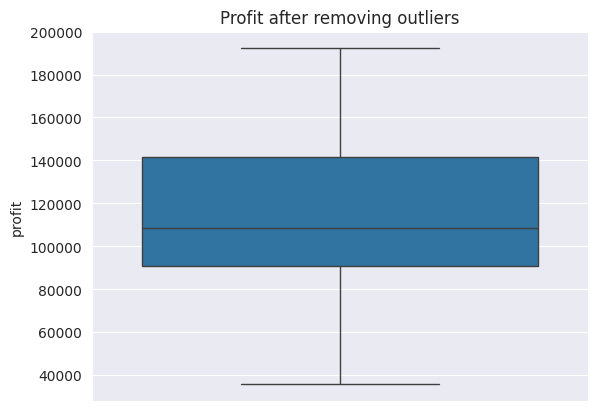

In [189]:
df3=startups.copy()
def drop_outliers(data, field_name):
    iqr = 1.5*(np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
    data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df3, 'profit')
sns.boxplot(df3.profit)
plt.title('Profit after removing outliers')

In [190]:
removed_outlier_model = sm.ols("profit~RnD+admin+marketing", data = df3).fit()
# Finding rsquared values
removed_outlier_model.rsquared , removed_outlier_model.rsquared_adj

(0.9613162435129847, 0.9587373264138503)

Text(0.5, 1.0, 'Profit')

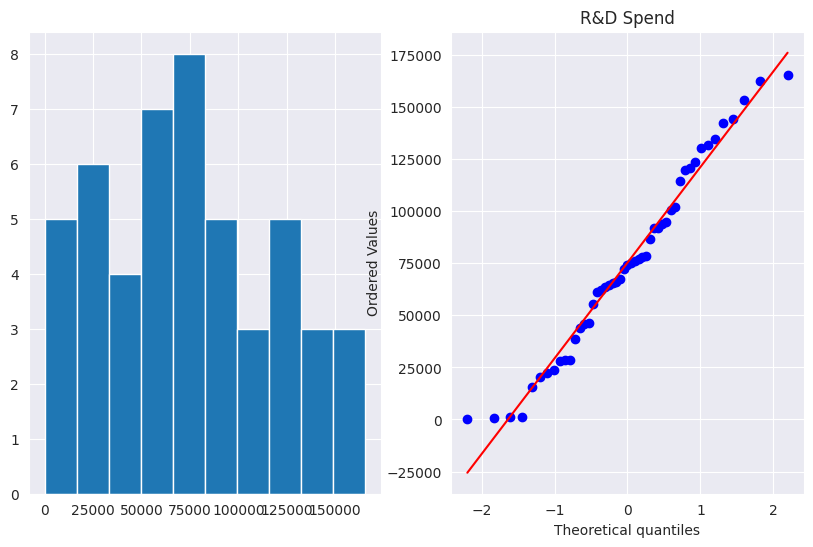

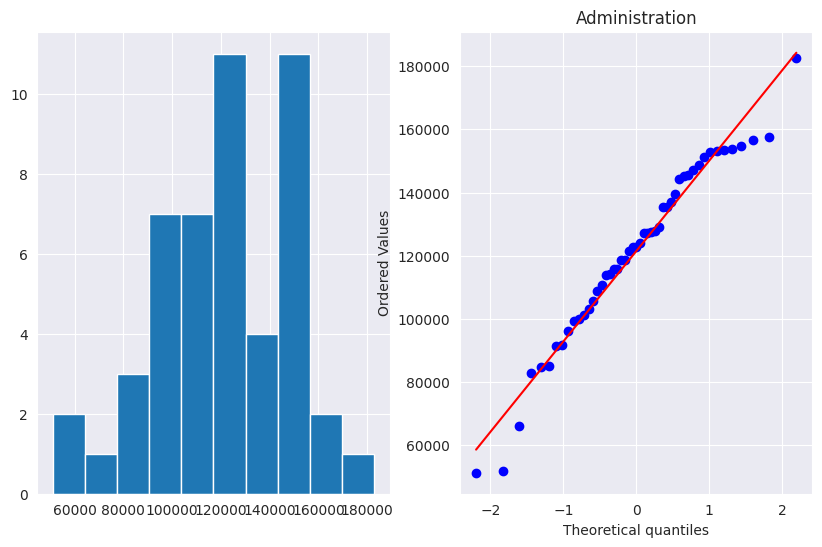

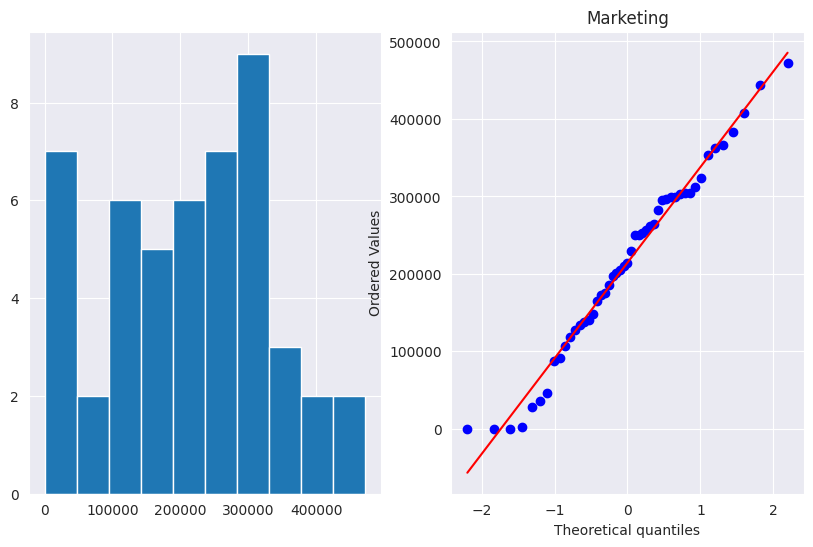

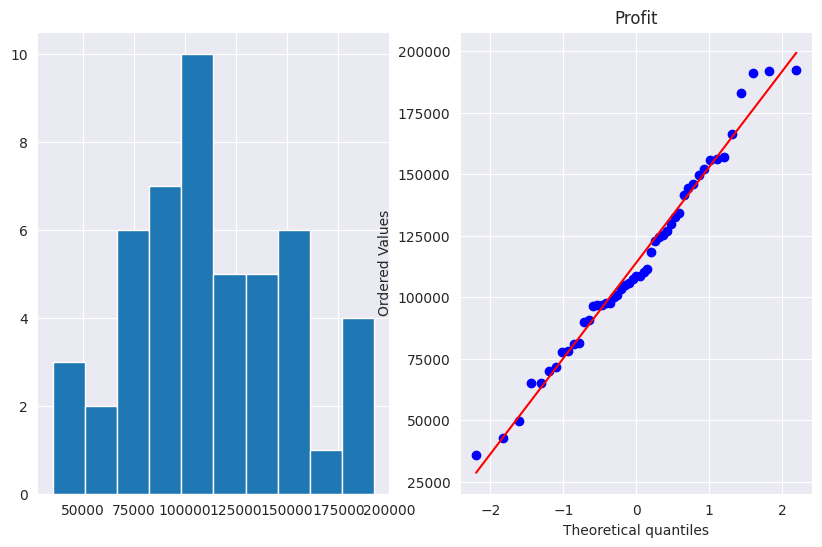

In [191]:
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)
plot_data(df3,'RnD')
plt.title('R&D Spend')
plot_data(df3,'admin')
plt.title('Administration')
plot_data(df3,'marketing')
plt.title('Marketing')
plot_data(df3,'profit')
plt.title('Profit')

<Axes: ylabel='state'>

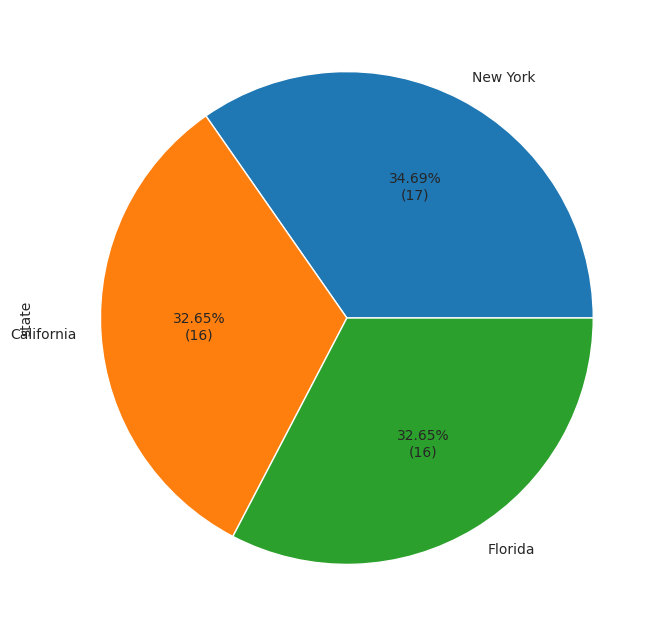

In [192]:
plt.figure(figsize=(8,8))
df3['state'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df3['state'].value_counts().sum())))

In [193]:
df3.state.value_counts()

New York      17
California    16
Florida       16
Name: state, dtype: int64

In [194]:

df3.columns

Index(['RnD', 'admin', 'marketing', 'state', 'profit'], dtype='object')

In [195]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
print('R&D Spend feature',shapiro(df3.RnD),'\n'
     'Administration feature',shapiro(df3.admin),'\n'
     'Marketing Spend feature',shapiro(df3.marketing),'\n'
     'Profit feature',shapiro(df3.profit))

R&D Spend feature ShapiroResult(statistic=0.9705320596694946, pvalue=0.25422945618629456) 
Administration feature ShapiroResult(statistic=0.9695430994033813, pvalue=0.23222042620182037) 
Marketing Spend feature ShapiroResult(statistic=0.9757171273231506, pvalue=0.4016808867454529) 
Profit feature ShapiroResult(statistic=0.9793393015861511, pvalue=0.5378792881965637)


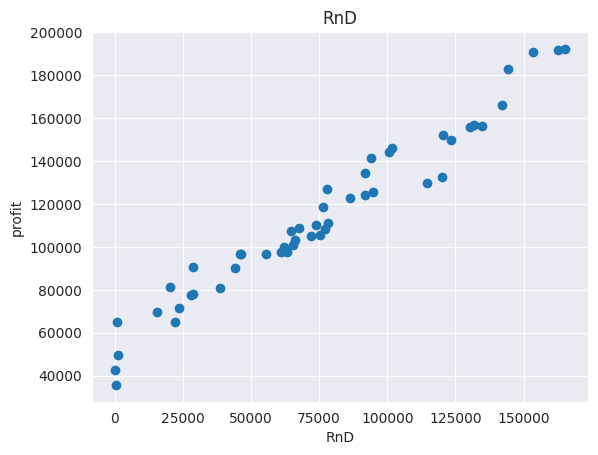

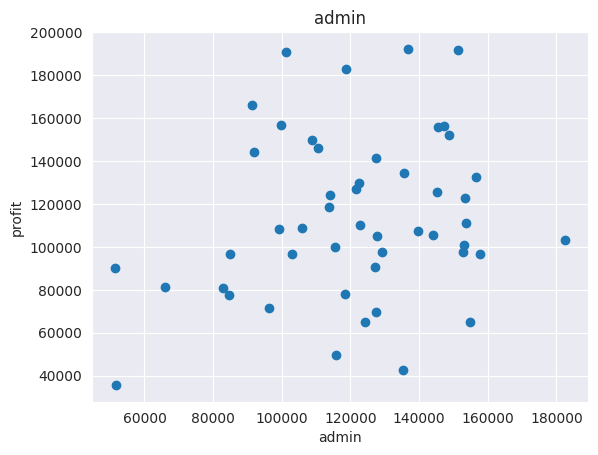

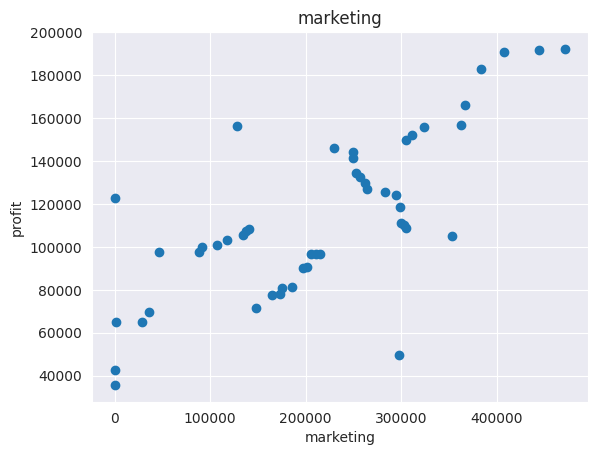

In [196]:
for feature in continuous_feature:
    if feature!="profit":
        data=df3.copy()
        plt.scatter(data[feature],data['profit'])
        plt.xlabel(feature)
        plt.ylabel('profit')
        plt.title(feature)
        plt.show()

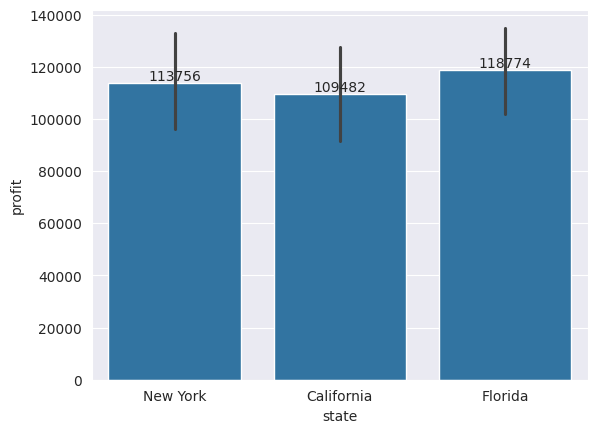

In [197]:
#Observation: R&D feature has a good linear relation with Profit as compare to other features
ax = sns.barplot(x = "state", y = 'profit', data = df3)
for i in ax.containers:
    ax.bar_label(i,)

In [198]:
df4=df3.drop('state',axis=1)
df4.head()

,RnD,admin,marketing,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [199]:
df4.corr()

,RnD,admin,marketing,profit
RnD,1.000000,0.243438,0.711654,0.978437
admin,0.243438,1.000000,-0.037280,0.205841
marketing,0.711654,-0.037280,1.000000,0.739307
profit,0.978437,0.205841,0.739307,1.000000


<Axes: >

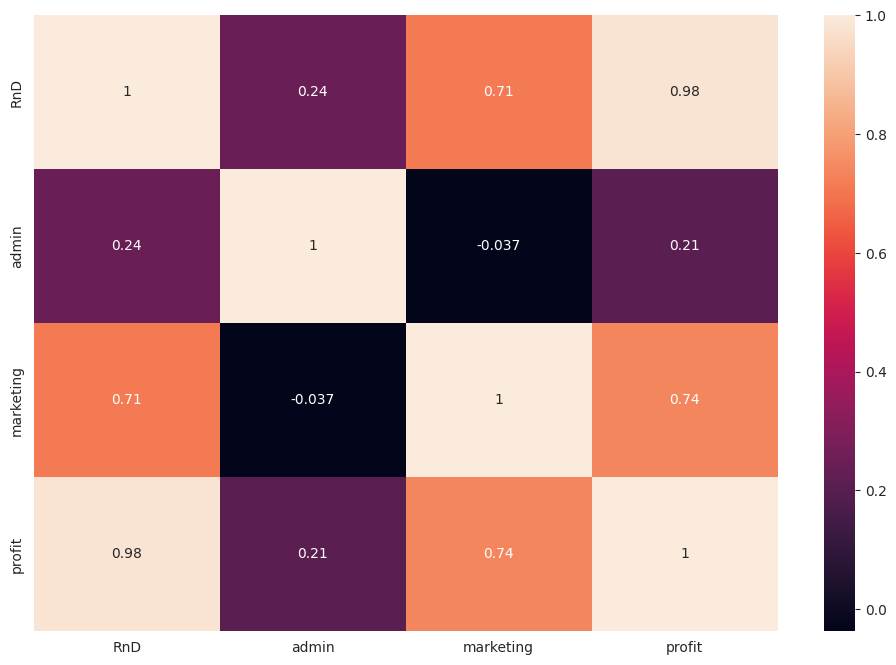

In [200]:
plt.figure(figsize=(12,8))
sns.heatmap(
    df4.corr(),
    annot=True)

In [201]:
#Median Imputation to handle Outlier in Profit
startups.profit.median()

107978.19

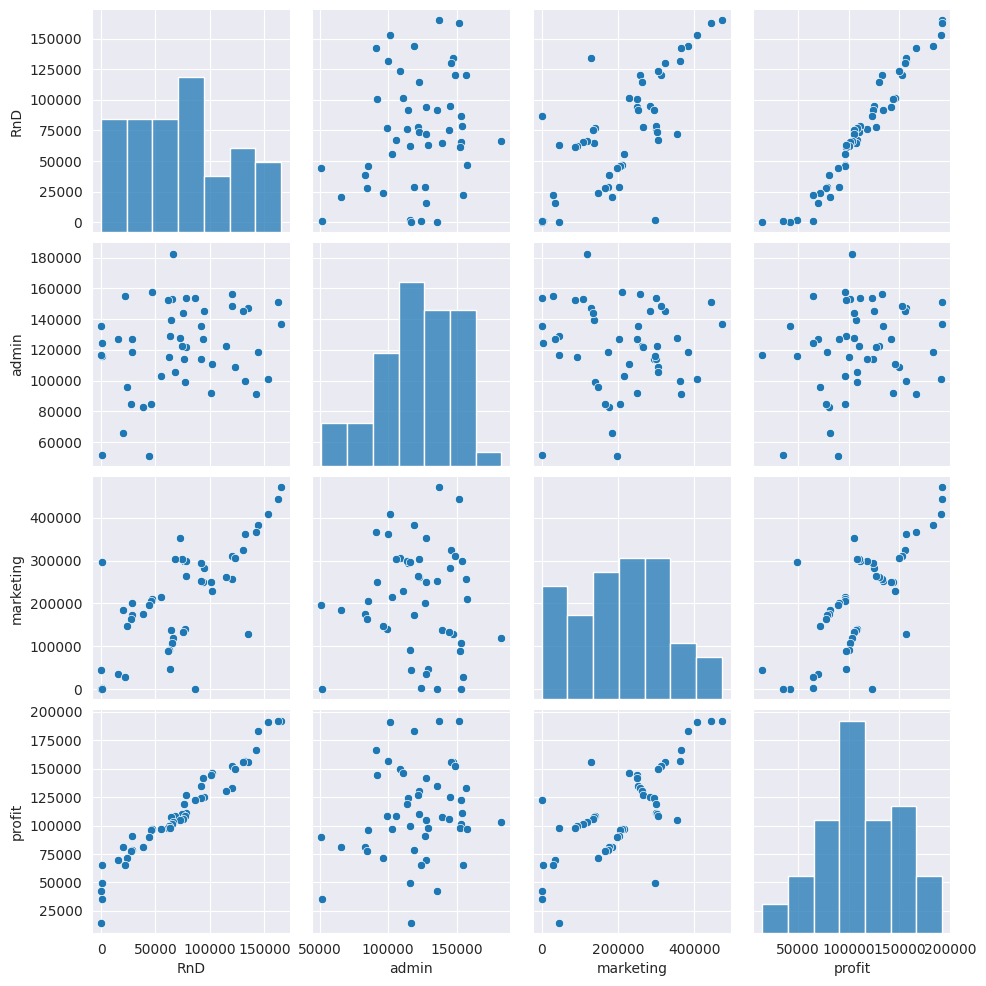

In [202]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(startups)

In [203]:
df_standard_scaled = df4.copy()
features = df_standard_scaled[continuous_feature]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,RnD,admin,marketing,profit
0,2.018325,0.552080,2.146120,2.071556
1,1.956704,1.069017,1.913596,2.059122
2,1.751650,-0.724297,1.613709,2.039490
3,1.548545,-0.098597,1.407457,1.823808
4,1.497818,-1.072513,1.265442,1.381401


In [204]:
startups1=startups.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
startups1

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [205]:
startups1[startups1.duplicated()] # No duplicated data

,RnD,admin,marketing,state,profit


In [206]:
startups1.describe()

,RnD,admin,marketing,profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


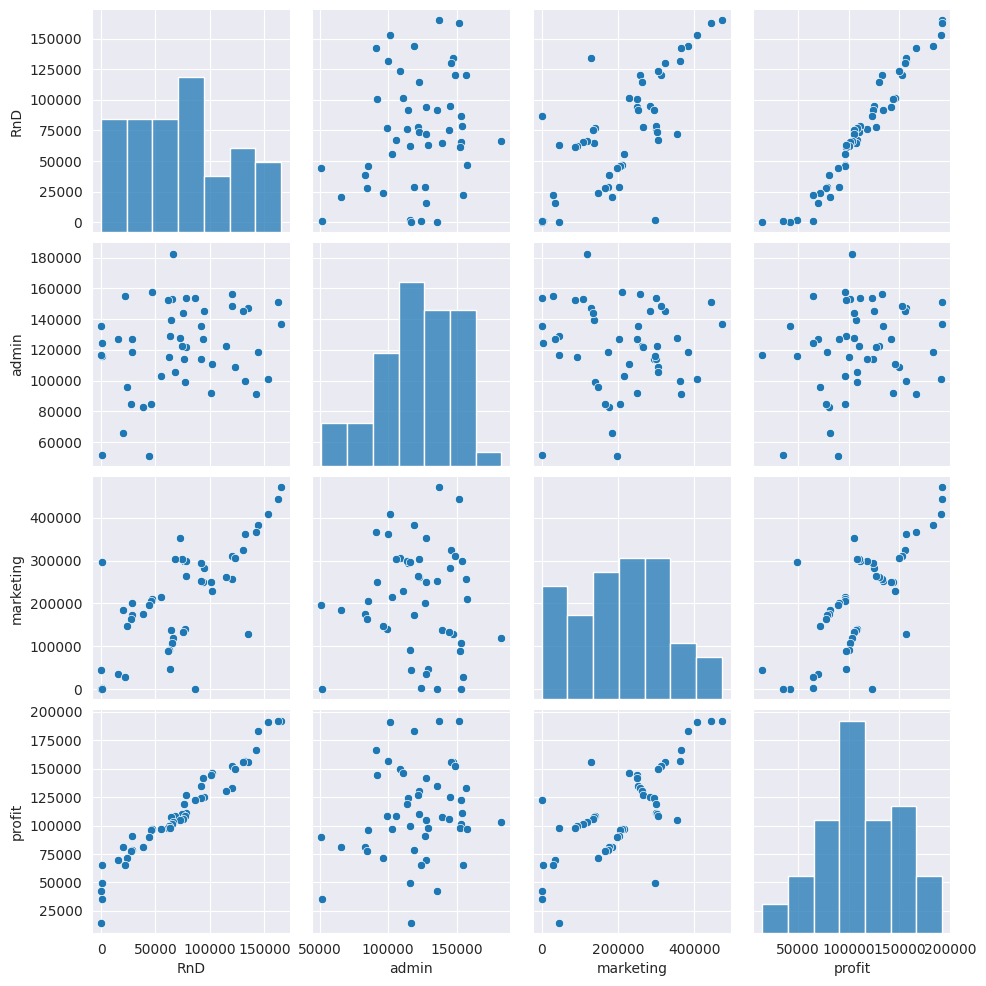

In [207]:
sns.set_style(style='darkgrid')
sns.pairplot(startups1)

In [208]:
#Build model
import statsmodels.formula.api as smf
model = smf.ols("profit~RnD+admin+marketing",data=startups1).fit()


In [209]:

#Model Testing
# Finding Coefficient parameters
model.params

Intercept    50122.192990
RnD              0.805715
admin           -0.026816
marketing        0.027228
dtype: float64

In [210]:
# Finding rsquared values
model.rsquared , model.rsquared_adj  # Model accuracy is 94.75%

# Build SLR and MLR models for insignificant variables 'ADMS' and 'MKTS'
# Also find their tvalues and pvalues
slr_a=smf.ols("profit~admin",data=startups1).fit()
slr_a.tvalues , slr_a.pvalues  # ADMS has in-significant pvalue

(Intercept    3.040044
 admin        1.419493
 dtype: float64,
 Intercept    0.003824
 admin        0.162217
 dtype: float64)

In [211]:
slr_m=smf.ols("profit~marketing",data=startups1).fit()
slr_m.tvalues , slr_m.pvalues  # MKTS has significant pvalue

(Intercept    7.808356
 marketing    7.802657
 dtype: float64,
 Intercept    4.294735e-10
 marketing    4.381073e-10
 dtype: float64)

In [212]:
mlr_am=smf.ols("profit~admin+marketing",data=startups1).fit()
mlr_am.tvalues , mlr_am.pvalues  # varaibles have significant pvalues

(Intercept    1.142741
 admin        2.467779
 marketing    8.281039
 dtype: float64,
 Intercept    2.589341e-01
 admin        1.729198e-02
 marketing    9.727245e-11
 dtype: float64)

In [213]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols("RnD~admin+marketing",data=startups1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("admin~RnD+marketing",data=startups1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("marketing~RnD+admin",data=startups1).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RnD','admin','marketing'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RnD,2.468903
1,admin,1.175091
2,marketing,2.326773


In [214]:
# Method to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
x = df_standard_scaled[['marketing','admin','RnD']]
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [vif(x.values, i) for i in range(len(x.columns))]
vif_data.sort_values(by = ['VIF'])

,Features,VIF
1,admin,1.175172
0,marketing,2.239957
2,RnD,2.377754


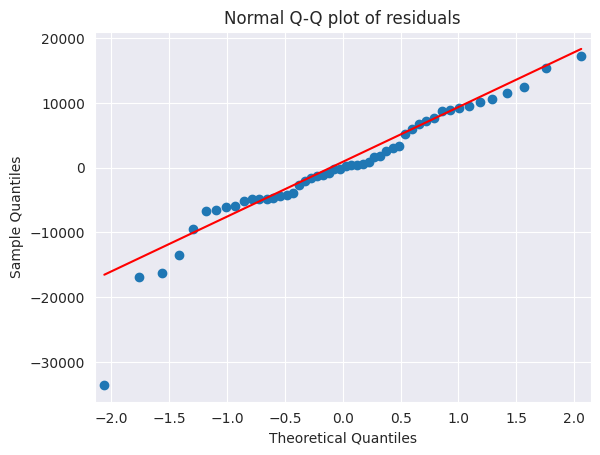

In [215]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)


import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

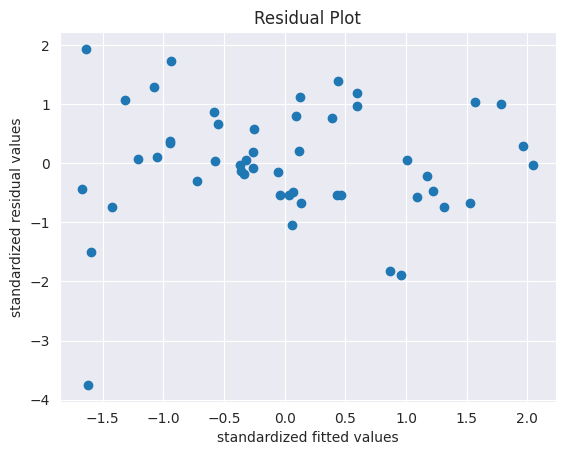

In [216]:
list(np.where(model.resid<-30000))

# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

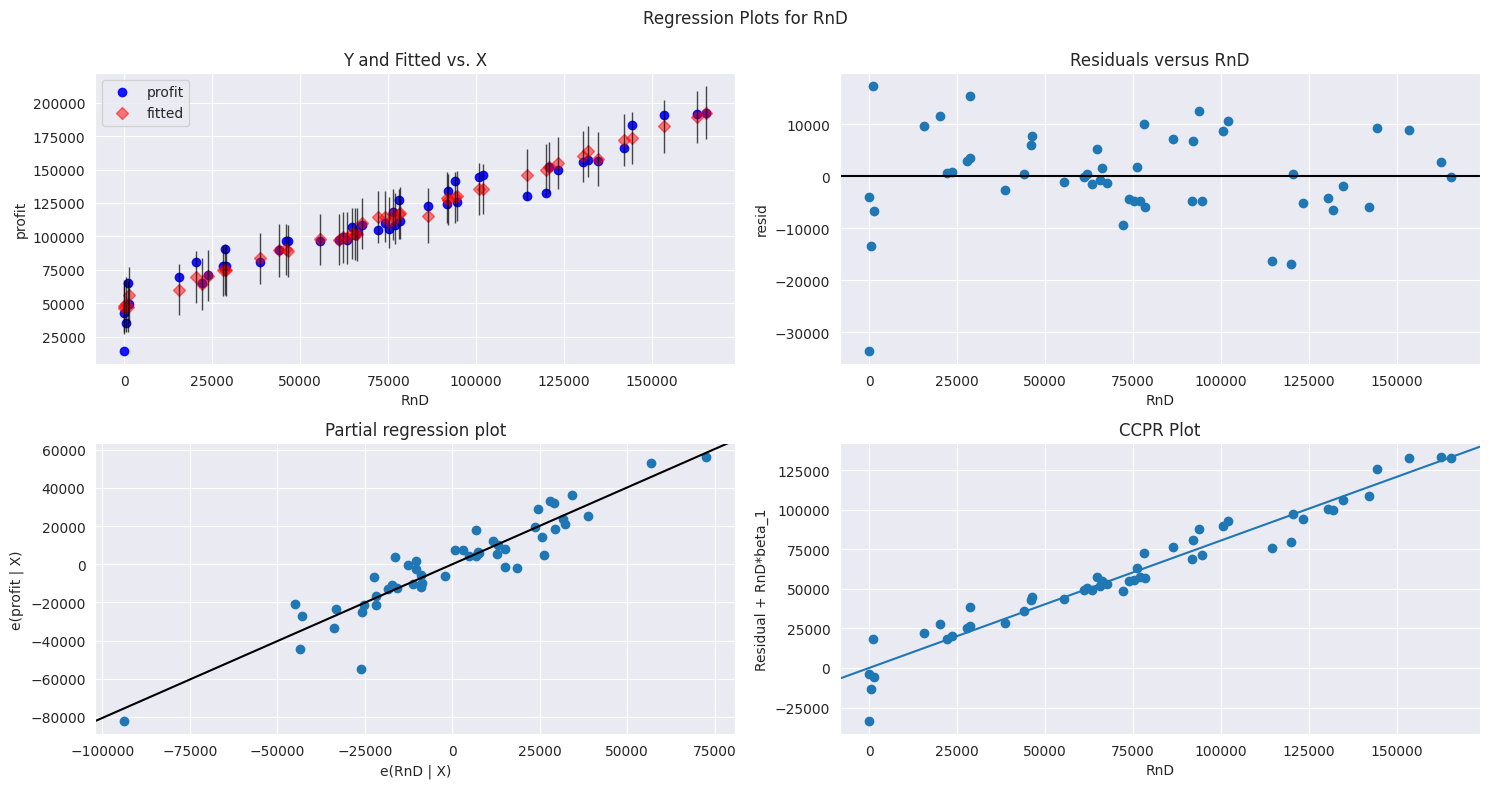

In [217]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RnD',fig=fig)
plt.show()

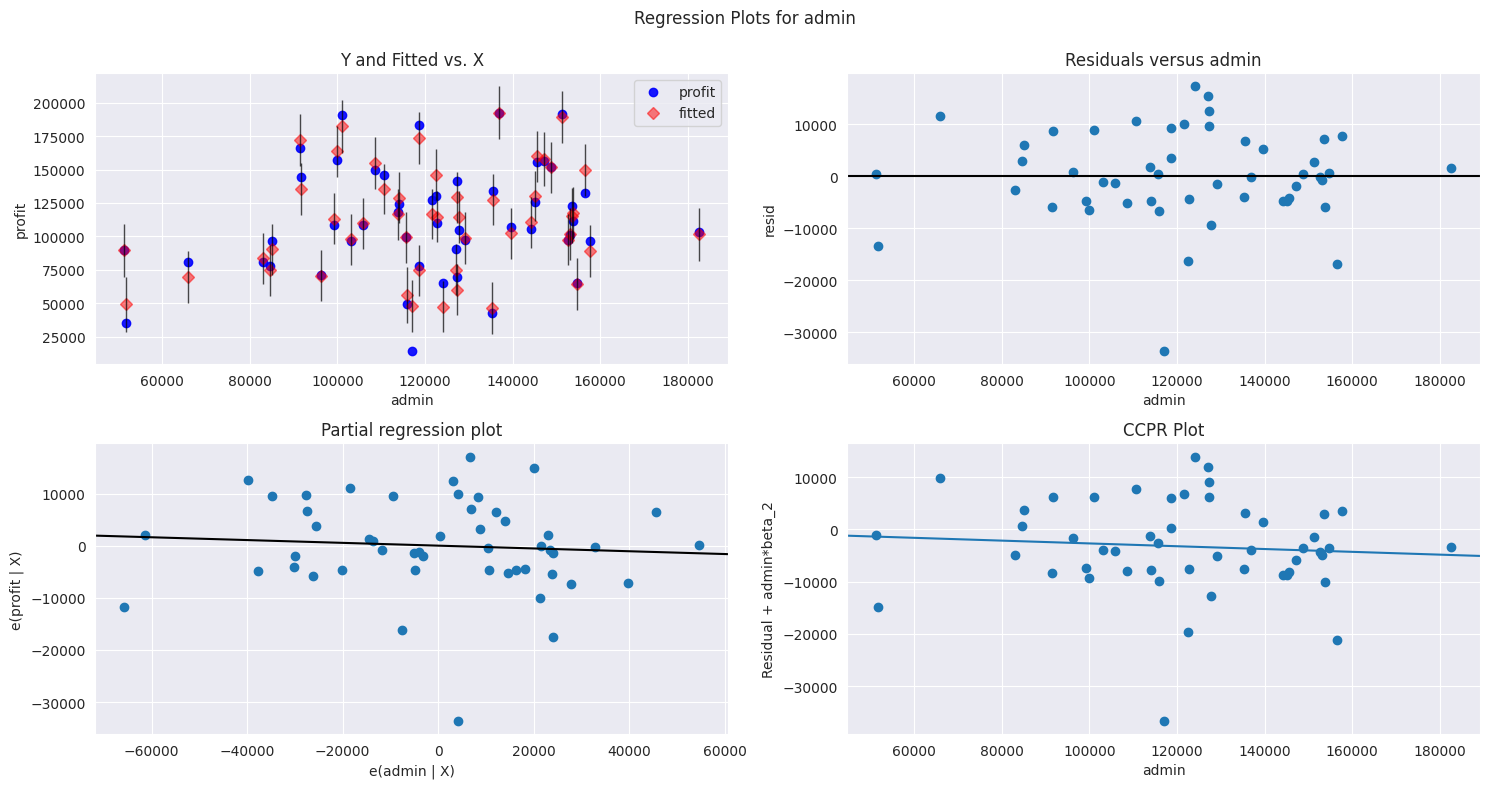

In [218]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'admin',fig=fig)
plt.show()

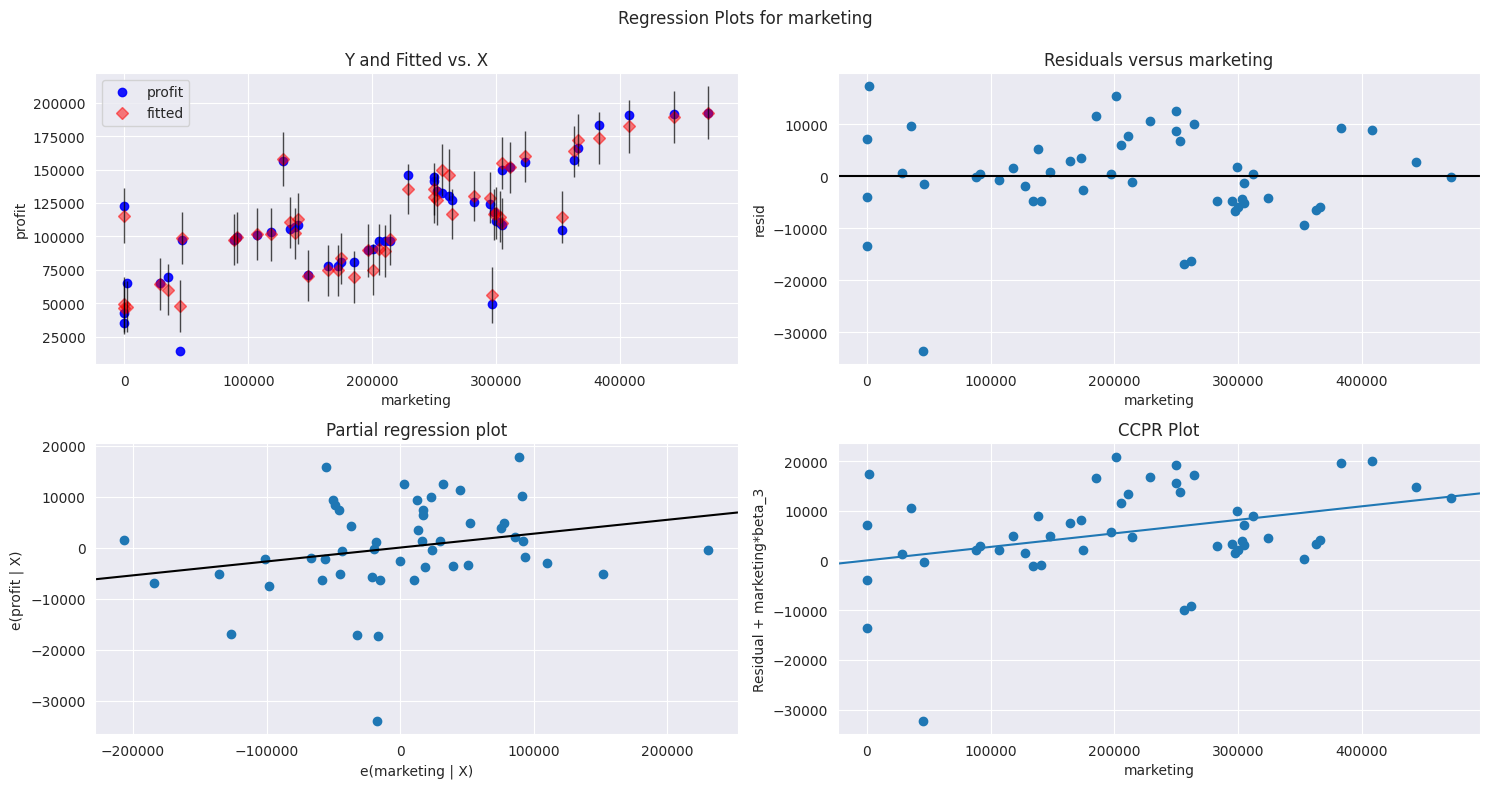

In [219]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'marketing',fig=fig)
plt.show()

In [220]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

In [221]:
import warnings
warnings.filterwarnings('ignore')

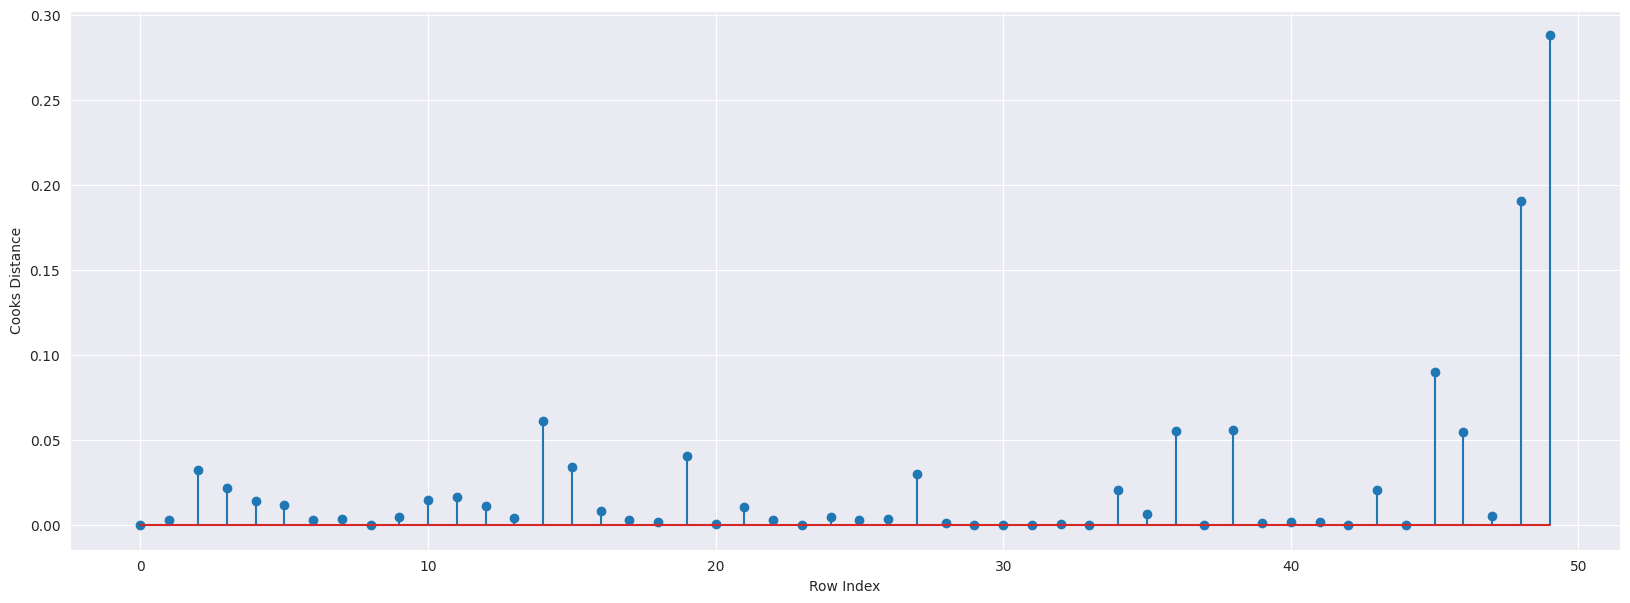

In [222]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startups1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

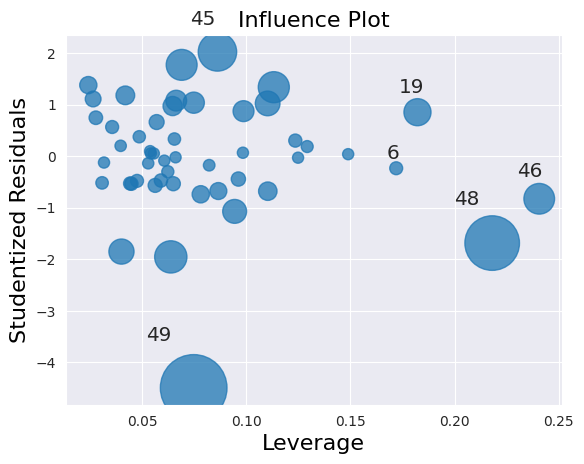

In [223]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [224]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=startups1.shape[1]
n=startups1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [225]:
startups1[startups1.index.isin([49])]

,RnD,admin,marketing,state,profit
49,0.0,116983.8,45173.06,California,14681.4


In [226]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
startups=startups1.drop(startups1.index[[49]],axis=0).reset_index(drop=True)
startups

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [227]:
while np.max(c)>0.5 :
    model=smf.ols("profit~RnD+admin+marketing",data=startups).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("profit~RnD+admin+marketing",data=startups).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [228]:
final_model.rsquared

startups

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [229]:
# say New data for prediction is
new_data=pd.DataFrame({'RnD':70000,"admin":90000,"marketing":140000},index=[0])
new_data

,RnD,admin,marketing
0,70000,90000,140000


In [230]:
# Manual Prediction of Price
final_model.predict(new_data)

0    108727.154753
dtype: float64

In [231]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(startups)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [232]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316


In [233]:
df_standard_scaled.columns

Index(['RnD', 'admin', 'marketing', 'profit'], dtype='object')

In [234]:
k=df4.shape[1]
n=df4.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.31


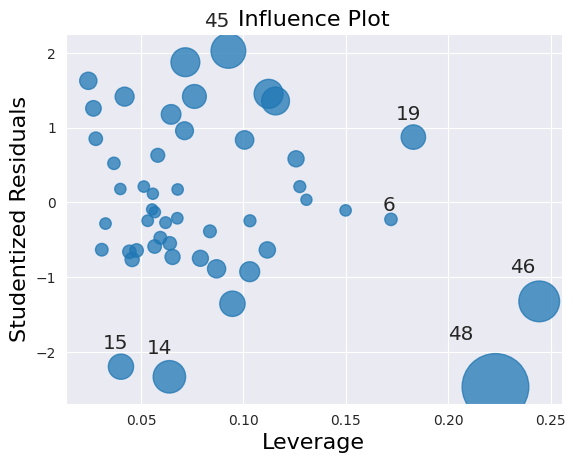

In [235]:
influence_points=final_model.get_influence()
c, p_value=influence_points.cooks_distance
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(final_model)
plt.show()

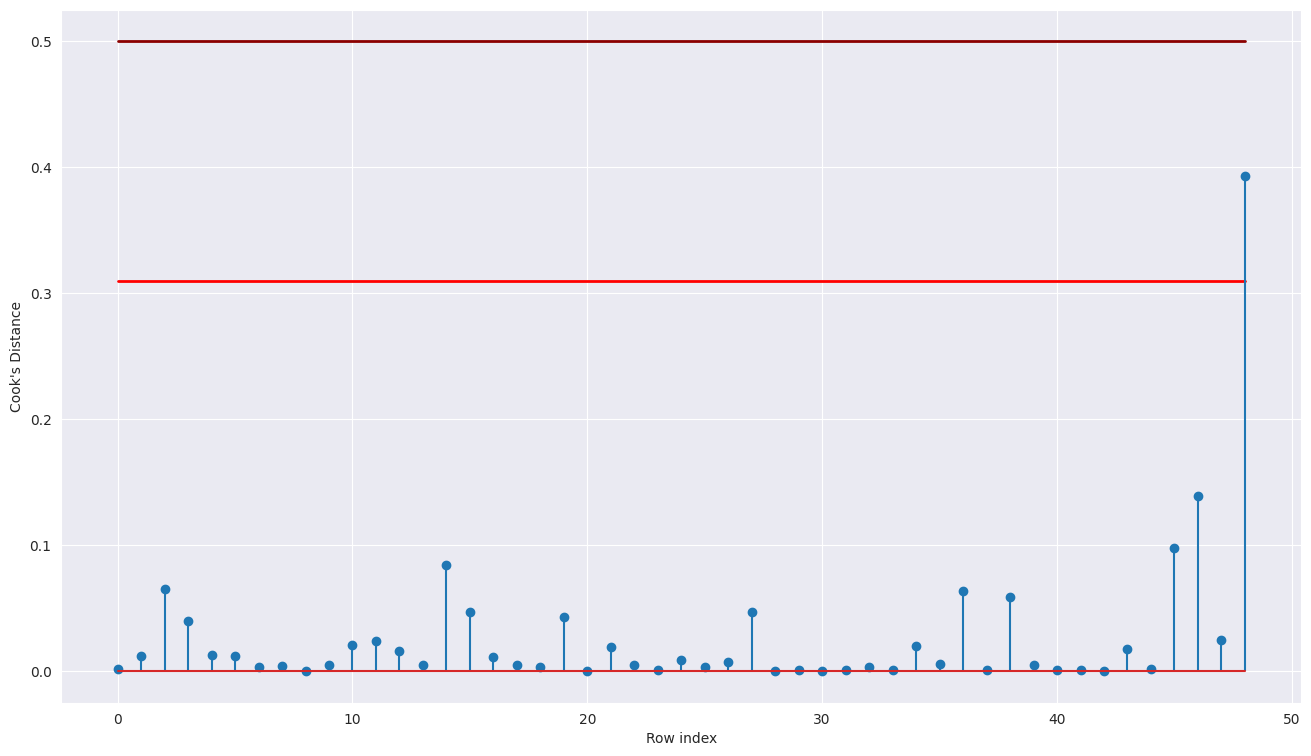

In [236]:
fig = plt.figure(figsize = (16,9))
x = [0,48]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.31,0.31]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(df4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [237]:
models={'Different_Models':['Raw_data','Median_Imputation_Outlier','Mean_Imputation_outlier','Removed_outlier','Final_Model'],
        'R_squared':[raw_model.rsquared,after_median_imputation_model.rsquared,after_mean_imputation_model.rsquared,removed_outlier_model.rsquared,final_model.rsquared],
        'R_squared_adjusted':[raw_model.rsquared_adj,after_median_imputation_model.rsquared_adj,after_mean_imputation_model.rsquared_adj,removed_outlier_model.rsquared_adj,final_model.rsquared_adj],
       'RMSE':[np.sqrt(raw_model.mse_resid),np.sqrt(after_median_imputation_model.mse_resid),np.sqrt(after_mean_imputation_model.mse_resid),np.sqrt(removed_outlier_model.mse_resid),np.sqrt(final_model.mse_resid)]}
model_table=pd.DataFrame(models)
model_table

,Different_Models,R_squared,R_squared_adjusted,RMSE
0,Raw_data,0.950746,0.947534,9232.334837
1,Median_Imputation_Outlier,0.918296,0.912967,11148.345424
2,Mean_Imputation_outlier,0.911954,0.906212,11570.325358
3,Removed_outlier,0.961316,0.958737,7753.807752
4,Final_Model,0.961316,0.958737,7753.807752
